# Developing Machine Learning Models for Back Pain Prediction: Utilizing Video Recordings of Gaits

# Defination of path

In [4]:
#path
train_backpain = "C:/Users/samue/Downloads/back pain/fold_1_train.npz"
test_backpain = "C:/Users/samue/Downloads/back pain/fold_1_test.npz"

# Loading training and testing data using NumPy's load function

In [5]:
import numpy as np

# Load training data
train_data = np.load(train_backpain)
print("Train Data:")
for key in train_data.files:
    print(key, train_data[key])

# Load testing data
test_data = np.load(test_backpain)
print("\nTest Data:")
for key in test_data.files:
    print(key, test_data[key])

Train Data:
features [[[[1.00764603e+02 2.38022598e+02 2.31407806e-01]
   [1.72600098e+01 2.54327744e+02 1.56937853e-01]
   [1.49715576e+02 3.42567291e+02 1.52008772e-01]
   ...
   [2.11144241e+02 4.60539703e+02 2.53425002e-01]
   [2.10184433e+02 5.16168945e+02 7.00620264e-02]
   [1.17081596e+02 5.88103394e+02 1.90139025e-01]]

  [[9.77485275e+01 2.37741867e+02 2.17795298e-01]
   [1.72983971e+01 2.54054138e+02 1.49099514e-01]
   [1.49466476e+02 3.44251526e+02 1.53913349e-01]
   ...
   [2.11719543e+02 4.61316162e+02 2.59282172e-01]
   [2.75888092e+02 4.85304840e+02 5.15260696e-02]
   [1.15945580e+02 5.87976318e+02 1.40550748e-01]]

  [[9.62432251e+01 2.37845505e+02 2.34310389e-01]
   [1.38858376e+01 2.53205154e+02 1.38449118e-01]
   [1.47956009e+02 3.43442993e+02 1.43870011e-01]
   ...
   [2.09245209e+02 4.60560181e+02 2.78817803e-01]
   [2.73407379e+02 4.81679688e+02 4.88563627e-02]
   [1.17311394e+02 5.87277161e+02 1.50819346e-01]]

  ...

  [[1.02347305e+02 2.37470764e+02 2.21447214e

# Loading train and test data from files and then printing the shapes of the arrays contained within those files

In [6]:
import numpy as np

# Load training data
train_data = np.load(train_backpain)
print("Train Data Shapes:")
for key in train_data.files:
    print(key, train_data[key].shape)

# Load testing data
test_data = np.load(test_backpain)
print("\nTest Data Shapes:")
for key in test_data.files:
    print(key, test_data[key].shape)

Train Data Shapes:
features (6293, 30, 12, 3)
labels (6293, 1)

Test Data Shapes:
features (1574, 30, 12, 3)
labels (1574, 1)


#  Visualizing the distribution of labels (risk levels) in both training and testing data using bar plots.

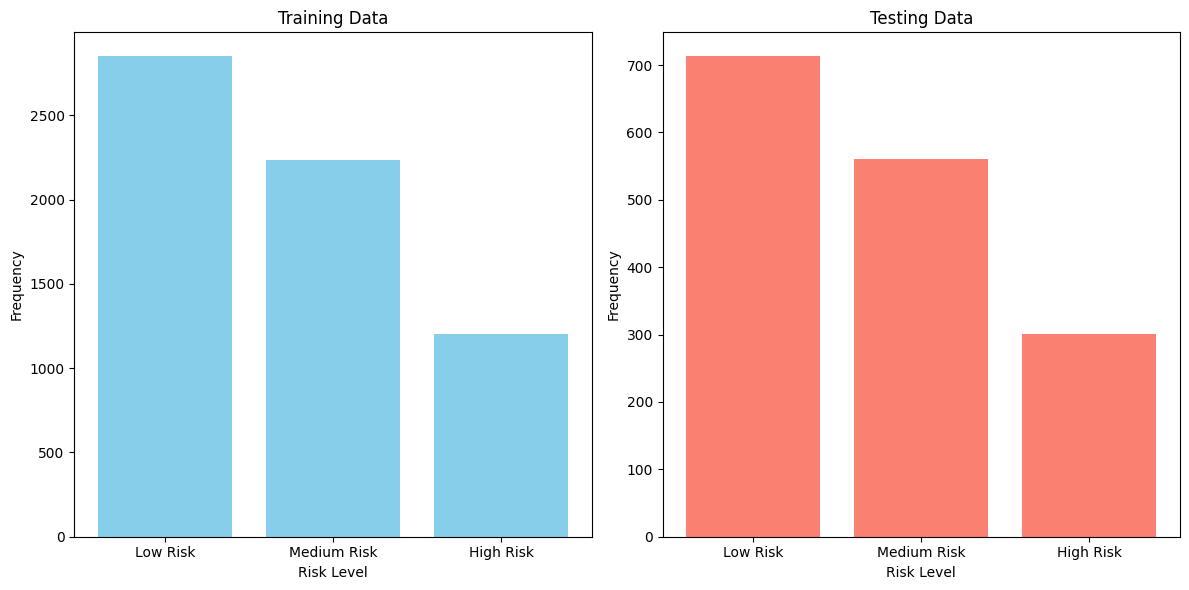

In [7]:
import matplotlib.pyplot as plt

# Extract labels from train and test data
train_labels = train_data['labels'].flatten()
test_labels = test_data['labels'].flatten()

# Map labels to their corresponding risk levels
label_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}

# Count the frequency of each label in train and test data
train_label_counts = [np.sum(train_labels == label) for label in label_mapping.keys()]
test_label_counts = [np.sum(test_labels == label) for label in label_mapping.keys()]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Train data plot
ax1.bar(label_mapping.values(), train_label_counts, color='skyblue')
ax1.set_title('Training Data')
ax1.set_xlabel('Risk Level')
ax1.set_ylabel('Frequency')

# Test data plot
ax2.bar(label_mapping.values(), test_label_counts, color='salmon')
ax2.set_title('Testing Data')
ax2.set_xlabel('Risk Level')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# This code extracts labels from both training and testing data, maps them to their corresponding risk levels, and then counts the frequency of each label in the datasets. Additionally, it calculates the total number of samples in both training and testing data

In [8]:
# Extract labels from train and test data
train_labels = train_data['labels'].flatten()
test_labels = test_data['labels'].flatten()

# Map labels to their corresponding risk levels
label_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}

# Count the frequency of each label in train and test data
train_label_counts = {label_mapping[label]: np.sum(train_labels == label) for label in label_mapping.keys()}
test_label_counts = {label_mapping[label]: np.sum(test_labels == label) for label in label_mapping.keys()}

# Print the counts
print("Training Data Label Counts:")
for label, count in train_label_counts.items():
    print(f"{label}: {count}")

print("\nTesting Data Label Counts:")
for label, count in test_label_counts.items():
    print(f"{label}: {count}")


# Total count of samples in training and testing data
total_train_samples = len(train_labels)
total_test_samples = len(test_labels)

# Print the total counts
print("Total Samples in Training Data:", total_train_samples)
print("Total Samples in Testing Data:", total_test_samples)


Training Data Label Counts:
Low Risk: 2851
Medium Risk: 2237
High Risk: 1205

Testing Data Label Counts:
Low Risk: 713
Medium Risk: 560
High Risk: 301
Total Samples in Training Data: 6293
Total Samples in Testing Data: 1574


# Preprocesses and normalizes the features from both training and testing data, applying some geometric modifications before normalization. Let me summarize the steps:

Normalization: Initially, the features are normalized using the normalize_features function.

Feature Modification: Feature modification code calculating vectors between specific points in the features and normalizing them.

Re-normalization: After the modification, the features are normalized again.

Printing: Finally, it prints the shapes of the normalized training and testing features.

In [9]:
import numpy as np

# Function to normalize features
def normalize_features(features):
    min_vals = np.min(features, axis=(0, 1, 2), keepdims=True)
    max_vals = np.max(features, axis=(0, 1, 2), keepdims=True)
    normalized_features = (features - min_vals) / (max_vals - min_vals)
    return normalized_features

# Extract features from train and test data
train_features = train_data['features']
test_features = test_data['features']

#feature modification code
train_features = train_features[:, :, :, 0:2]

origin = (train_features[:, :, 0, :] + train_features[:, :, 1, :]) / 2
origin = np.expand_dims(origin, axis=2)
train_features = train_features - origin

p1 = origin
p2 = (train_features[:, :, 6, :] + train_features[:, :, 7, :]) / 2
p2 = np.expand_dims(p2, axis=2)

dis = p1 - p2

norms = np.linalg.norm(dis, axis=3, keepdims=True)
norms = np.repeat(norms, 12, axis=2)

train_features = train_features / norms

# Normalize training features
train_features_normalized = normalize_features(train_features)

# Normalize testing features
test_features_normalized = normalize_features(test_features)

#feature modification code to test features
test_features = test_features[:, :, :, 0:2]

origin_test = (test_features[:, :, 0, :] + test_features[:, :, 1, :]) / 2
origin_test = np.expand_dims(origin_test, axis=2)
test_features = test_features - origin_test

p1_test = origin_test
p2_test = (test_features[:, :, 6, :] + test_features[:, :, 7, :]) / 2
p2_test = np.expand_dims(p2_test, axis=2)

dis_test = p1_test - p2_test

norms_test = np.linalg.norm(dis_test, axis=3, keepdims=True)
norms_test = np.repeat(norms_test, 12, axis=2)

test_features = test_features / norms_test

# Normalize testing features
test_features_normalized = normalize_features(test_features)



# Printing the shapes of normalized features
print("Normalized Training Features Shape:", train_features_normalized.shape)
print("Normalized Testing Features Shape:", test_features_normalized.shape)


Normalized Training Features Shape: (6293, 30, 12, 2)
Normalized Testing Features Shape: (1574, 30, 12, 2)


# This code is performing classification using the K-Nearest Neighbors (KNN) algorithm, including hyperparameter tuning using grid search, evaluating performance metrics such as accuracy, sensitivity, and specificity, visualizing the confusion matrix, and printing the classification report.

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Label 0: Sensitivity = 0.99, Specificity = 0.98
Label 1: Sensitivity = 0.99, Specificity = 0.99
Label 2: Sensitivity = 0.94, Specificity = 1.00
Test Accuracy: 0.9817315329626688


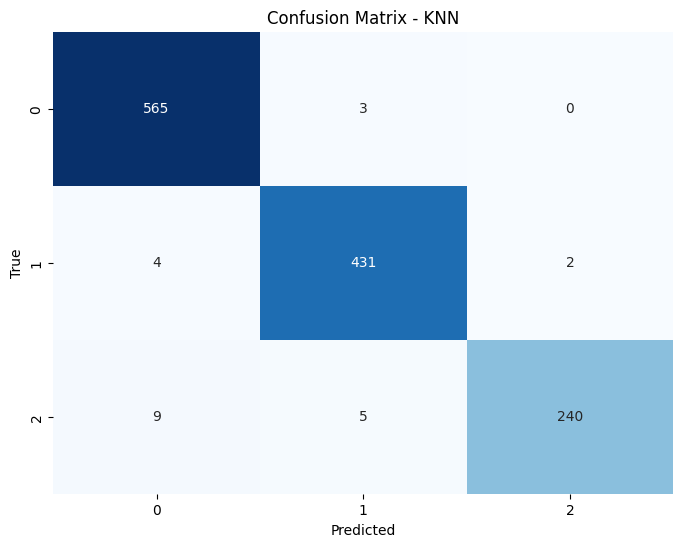

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       568
         1.0       0.98      0.99      0.98       437
         2.0       0.99      0.94      0.97       254

    accuracy                           0.98      1259
   macro avg       0.98      0.98      0.98      1259
weighted avg       0.98      0.98      0.98      1259



In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_normalized, train_labels, test_size=0.2, random_state=42)

# Reshape the features to two-dimensional arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define parameters for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

# Get the best estimator
best_knn_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the best estimator on the training data
best_knn_model.fit(X_train_flat, y_train)

# Predict labels on the test data
y_pred_knn = best_knn_model.predict(X_test_flat)

# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate sensitivity and specificity for each label
for i in range(len(cm_knn)):
    sensitivity_knn = cm_knn[i, i] / np.sum(cm_knn[i, :])
    specificity_knn = np.sum(np.delete(np.delete(cm_knn, i, axis=0), i, axis=1)) / np.sum(np.delete(cm_knn, i, axis=0))
    print(f"Label {i}: Sensitivity = {sensitivity_knn:.2f}, Specificity = {specificity_knn:.2f}")

# Evaluate the best estimator on the test set
test_accuracy_knn = best_knn_model.score(X_test_flat, y_test)
print("Test Accuracy:", test_accuracy_knn)


import seaborn as sns
from sklearn.metrics import classification_report

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


# This code is performing classification using the Decision Tree classifier , including hyperparameter tuning using grid search, evaluating performance metrics such as accuracy, sensitivity, and specificity, visualizing the confusion matrix, and printing the classification report.

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Label 0: Sensitivity = 0.85, Specificity = 0.84
Label 1: Sensitivity = 0.81, Specificity = 0.91
Label 2: Sensitivity = 0.72, Specificity = 0.94
Test Accuracy: 0.8087674714104193


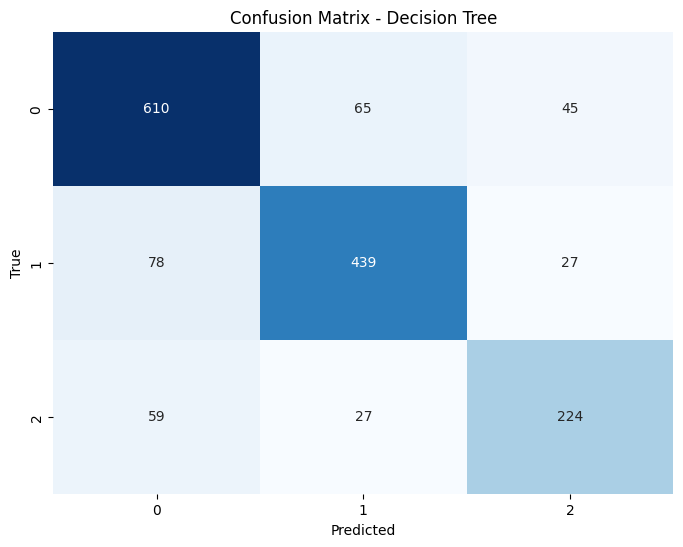

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       720
         1.0       0.83      0.81      0.82       544
         2.0       0.76      0.72      0.74       310

    accuracy                           0.81      1574
   macro avg       0.80      0.79      0.80      1574
weighted avg       0.81      0.81      0.81      1574



In [31]:
from sklearn.tree import DecisionTreeClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_normalized, train_labels, random_state=42)

# Reshape the features to two-dimensional arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define parameters for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

# Get the best estimator
best_dt_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the best estimator on the training data
best_dt_model.fit(X_train_flat, y_train)

# Predict labels on the test data
y_pred_dt = best_dt_model.predict(X_test_flat)

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate sensitivity and specificity for each label
for i in range(len(cm_dt)):
    sensitivity_dt = cm_dt[i, i] / np.sum(cm_dt[i, :])
    specificity_dt = np.sum(np.delete(np.delete(cm_dt, i, axis=0), i, axis=1)) / np.sum(np.delete(cm_dt, i, axis=0))
    print(f"Label {i}: Sensitivity = {sensitivity_dt:.2f}, Specificity = {specificity_dt:.2f}")

# Evaluate the best estimator on the test set
test_accuracy_dt = best_dt_model.score(X_test_flat, y_test)
print("Test Accuracy:", test_accuracy_dt)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


# This code is performing classification using the Support Vector Machine (SVM) classifier  , including hyperparameter tuning using grid search, evaluating performance metrics such as accuracy, sensitivity, and specificity, visualizing the confusion matrix, and printing the classification report.

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Label 0: Sensitivity = 0.88, Specificity = 0.74
Label 1: Sensitivity = 0.76, Specificity = 0.93
Label 2: Sensitivity = 0.60, Specificity = 0.96
Test Accuracy: 0.7820838627700127


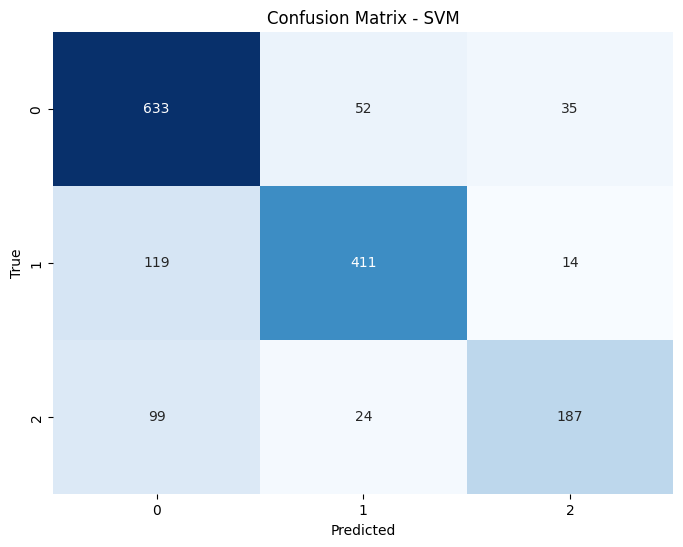

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81       720
         1.0       0.84      0.76      0.80       544
         2.0       0.79      0.60      0.68       310

    accuracy                           0.78      1574
   macro avg       0.79      0.75      0.76      1574
weighted avg       0.79      0.78      0.78      1574



In [33]:
from sklearn.svm import SVC

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_normalized, train_labels, random_state=42)

# Reshape the features to two-dimensional arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the SVM model
svm_model = SVC()

# Define parameters for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

# Get the best estimator
best_svm_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the best estimator on the training data
best_svm_model.fit(X_train_flat, y_train)

# Predict labels on the test data
y_pred_svm = best_svm_model.predict(X_test_flat)

# Calculate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Calculate sensitivity and specificity for each label
for i in range(len(cm_svm)):
    sensitivity_svm = cm_svm[i, i] / np.sum(cm_svm[i, :])
    specificity_svm = np.sum(np.delete(np.delete(cm_svm, i, axis=0), i, axis=1)) / np.sum(np.delete(cm_svm, i, axis=0))
    print(f"Label {i}: Sensitivity = {sensitivity_svm:.2f}, Specificity = {specificity_svm:.2f}")

# Evaluate the best estimator on the test set
test_accuracy_svm = best_svm_model.score(X_test_flat, y_test)
print("Test Accuracy:", test_accuracy_svm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


# This code is performing classification using the Random Forest classifier, including hyperparameter tuning using grid search, evaluating performance metrics such as accuracy, sensitivity, and specificity, visualizing the confusion matrix, and printing the classification report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features_normalized, train_labels, test_size=0.2, random_state=42)

# Reshape the features to two-dimensional arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Fit the best estimator on the training data
best_rf_model.fit(X_train_flat, y_train)

# Predict labels on the test data
y_pred_rf = best_rf_model.predict(X_test_flat)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate sensitivity and specificity for each label
for i in range(len(cm_rf)):
    sensitivity_rf = cm_rf[i, i] / np.sum(cm_rf[i, :])
    specificity_rf = np.sum(np.delete(np.delete(cm_rf, i, axis=0), i, axis=1)) / np.sum(np.delete(cm_rf, i, axis=0))
    print(f"Label {i}: Sensitivity = {sensitivity_rf:.2f}, Specificity = {specificity_rf:.2f}")

# Evaluate the best estimator on the test set
test_accuracy_rf = best_rf_model.score(X_test_flat, y_test)
print("Test Accuracy:", test_accuracy_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


# The code calculates the accuracy for each of the models (SVM, Random Forest, KNN, and Decision Tree) and then plots these accuracies as a bar chart. Additionally, it prints the accuracy percentage for each model.

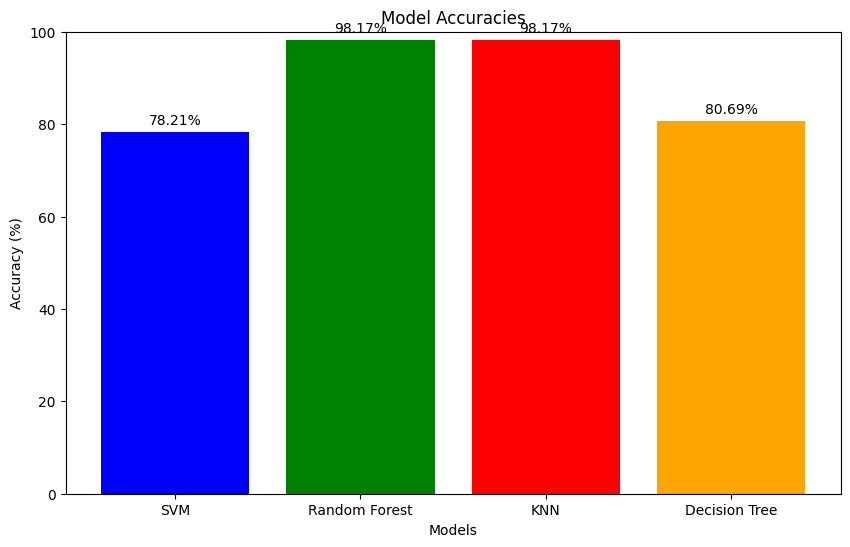

Accuracy Percentage:
SVM: 78.21%
Random Forest: 98.17%
KNN: 98.17%
Decision Tree: 80.69%


In [40]:
# Calculate accuracy for each model
accuracy_svm = test_accuracy_svm * 100
accuracy_rf = test_accuracy_rf * 100
accuracy_knn = test_accuracy_knn * 100
accuracy_dt = test_accuracy_dt * 100

# Plot accuracies
models = ['SVM', 'Random Forest', 'KNN', 'Decision Tree']
accuracies = [accuracy_svm, accuracy_rf, accuracy_knn, accuracy_dt]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Annotate bars with values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()

# Print accuracy percentage for each model
print("Accuracy Percentage:")
print(f"SVM: {accuracy_svm:.2f}%")
print(f"Random Forest: {accuracy_rf:.2f}%")
print(f"KNN: {accuracy_knn:.2f}%")
print(f"Decision Tree: {accuracy_dt:.2f}%")


# These plots visualize the sensitivity and specificity metrics for each model (SVM, Random Forest, KNN, and Decision Tree). Sensitivity measures the proportion of actual positive cases that were correctly identified by the model, while specificity measures the proportion of actual negative cases that were correctly identified by the model.

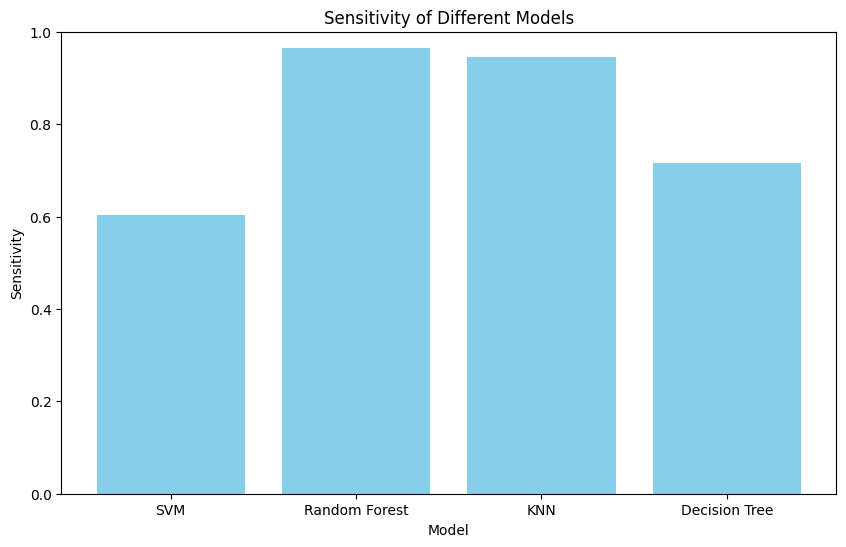

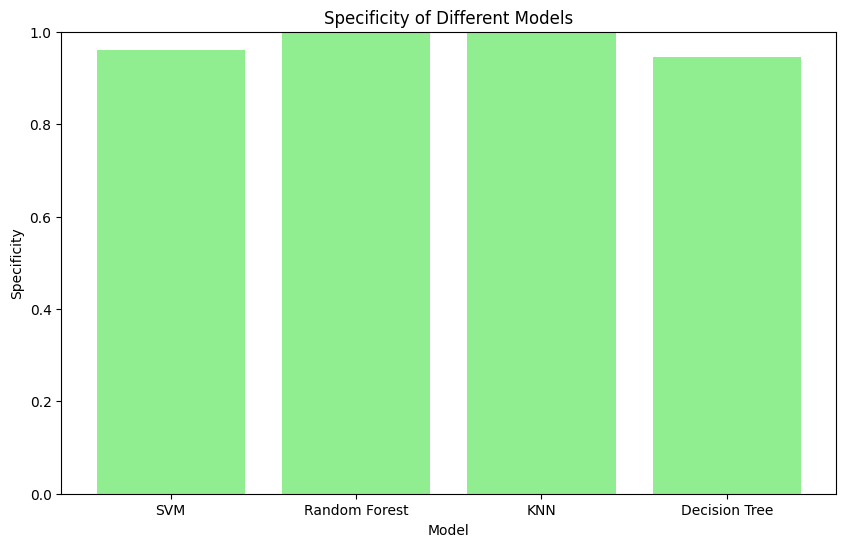

In [35]:
import matplotlib.pyplot as plt

# Define labels
labels = ['SVM', 'Random Forest', 'KNN', 'Decision Tree']

# Define lists of sensitivity and specificity for each model
sensitivity = [sensitivity_svm, sensitivity_rf, sensitivity_knn, sensitivity_dt]
specificity = [specificity_svm, specificity_rf, specificity_knn, specificity_dt]

# Plot sensitivity
plt.figure(figsize=(10, 6))
plt.bar(labels, sensitivity, color='skyblue')
plt.title('Sensitivity of Different Models')
plt.xlabel('Model')
plt.ylabel('Sensitivity')
plt.ylim(0, 1)
plt.show()

# Plot specificity
plt.figure(figsize=(10, 6))
plt.bar(labels, specificity, color='lightgreen')
plt.title('Specificity of Different Models')
plt.xlabel('Model')
plt.ylabel('Specificity')
plt.ylim(0, 1)
plt.show()
